**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Read in data**

In [2]:
data = pd.read_csv("data.csv")
data.head()

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1148\2866497067.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


**Evaluate data characteristics: feature min/max values, feature mean values, number of features, null values, unknown values, etc.**

In [3]:
data.shape

(3279, 1559)

In [4]:
data.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Since our non-binary features are encoded with string literals instead of integers, we want to convert these columns to integer columns.  This requires dealing with '?' values for observations in which height, width, and/or local values are unknown.**

In [5]:
print(data.height.unique())
print(data.width.unique())
print(data.aratio.unique())
print(data.local.unique())

[' 125' '  57' '  33' '  60' '  59' '   ?' '  90' '  30' '  35' '  72'
 '  50' ' 120' '   2' '  65' '  44' '  80' '  64' '  31' ' 100' '  74'
 '  93' '  21' '  20' '  55' ' 135' '  26' ' 136' ' 124' '  52' '  45'
 ' 165' '  25' ' 105' '  88' '  73' '  43' ' 477' '  70' '  40' ' 240'
 '  51' '  68' ' 171' '  71' '  29' '  38' '  36' '  46' '  12' '  95'
 '  41' '  96' '  16' ' 150' ' 159' ' 110' ' 161' '  15' ' 195' '  11'
 ' 114' ' 160' '  63' ' 134' '  24' '  62' ' 106' ' 200' '  39' ' 115'
 '  75' '  10' ' 207' '  32' '  27' '  48' ' 107' '  28' '  23' '  54'
 ' 102' ' 149' ' 119' '  76' '  79' ' 158' ' 154' '   8' ' 153' '  83'
 ' 174' ' 156' ' 128' '  14' ' 172' ' 104' ' 146' '  98' ' 144' ' 175'
 ' 116' ' 145' '  99' ' 220' ' 185' '  34' ' 239' ' 140' ' 262' ' 142'
 ' 191' '  22' '  87' ' 257' '  66' ' 108' ' 359' '  85' ' 132' ' 237'
 ' 131' '  58' '  78' ' 212' '  18' ' 123' '  92' ' 148' '  84' ' 133'
 ' 152' '  69' '  94' '  82' ' 214' '  49' '  61' '  89' '  56' ' 193'
 '  77

**We want to find out how many of the observations have unknown values to determine how to drop or impute them appropriately.**

In [6]:
valid_height = pd.to_numeric(data.height[data.height != '   ?'])
valid_width = pd.to_numeric(data.width[data.width != '   ?'])
valid_local = pd.to_numeric(data.local[data.local != '?'])
valid_aratio = pd.to_numeric(data.aratio[data.aratio != '     ?'])

invalid_height = data.height[data.height == '   ?']
invalid_width = data.width[data.width == '   ?']
invalid_local = data.local[data.local == '?']
invalid_aratio = data.aratio[data.aratio == '     ?']

print("Number of entries with unknown height: "+str(len(invalid_height))+" out of 3279 ("+str(round(100*len(invalid_height)/3279, 2))+"%)")
print("Number of entries with unknown width: "+str(len(invalid_width))+" out of 3279 ("+str(round(100*len(invalid_width)/3279, 2))+"%)")
print("Number of entries with unknown local: "+str(len(invalid_local))+" out of 3279 ("+str(round(100*len(invalid_local)/3279, 2))+"%)")
print("Number of entries with unknown aratio: "+str(len(invalid_aratio))+" out of 3279 ("+str(round(100*len(invalid_aratio)/3279, 2))+"%)")

Number of entries with unknown height: 903 out of 3279 (27.54%)
Number of entries with unknown width: 901 out of 3279 (27.48%)
Number of entries with unknown local: 15 out of 3279 (0.46%)
Number of entries with unknown aratio: 910 out of 3279 (27.75%)


**Since there are a significant amount of entries missing height, width, and aratio data, we do not want to drop all observations missing these features.  We will instead impute them with the mean value of the respective columns to preserve more of our data.**

**By contrast, the 'local' variable has invalid values for less than 1% of entries, so we will simply drop them, as we do not want to impute using mean values for a binary variable, and we will not lose much of our data.**

In [7]:
height_mean = int(valid_height.mean())
width_mean = int(valid_width.mean())
aratio_mean = int(valid_aratio.mean())
height_mean, width_mean, aratio_mean

(64, 155, 3)

**Impute height and width unknowns with mean values, and drop unknown local values**

In [8]:
data.height[data.height == '   ?'] = height_mean
data.width[data.width == '   ?'] = width_mean
data.aratio[data.aratio == '     ?'] = aratio_mean
data = data[data.local != '   ?']
data = data[data.local != '?']

C:\Users\Sydney\AppData\Local\Temp\ipykernel_1148\331976387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.height[data.height == '   ?'] = height_mean
C:\Users\Sydney\AppData\Local\Temp\ipykernel_1148\331976387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.width[data.width == '   ?'] = width_mean
C:\Users\Sydney\AppData\Local\Temp\ipykernel_1148\331976387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ara

**Encode ad/non-ad label as binary label**

In [9]:
data.ad.unique()

array(['ad.', 'nonad.'], dtype=object)

In [10]:
data['is_ad'] = data.ad == 'ad.'
data = data.drop(columns = 'ad')

**Convert imputed df to numeric formatting**

In [11]:
data = data.apply(pd.to_numeric)

**Visualize non-binary variable distribution between ads and non-ads**

In [12]:
pair = data[['height', 'width', 'aratio', 'is_ad']]
hist = data[['aratio', 'is_ad']]

In [13]:
pair.head()

,height,width,aratio,is_ad
0,125,125,1.0000,True
1,57,468,8.2105,True
2,33,230,6.9696,True
3,60,468,7.8000,True
4,60,468,7.8000,True


In [14]:
hist.head()

,aratio,is_ad
0,1.0000,True
1,8.2105,True
2,6.9696,True
3,7.8000,True
4,7.8000,True


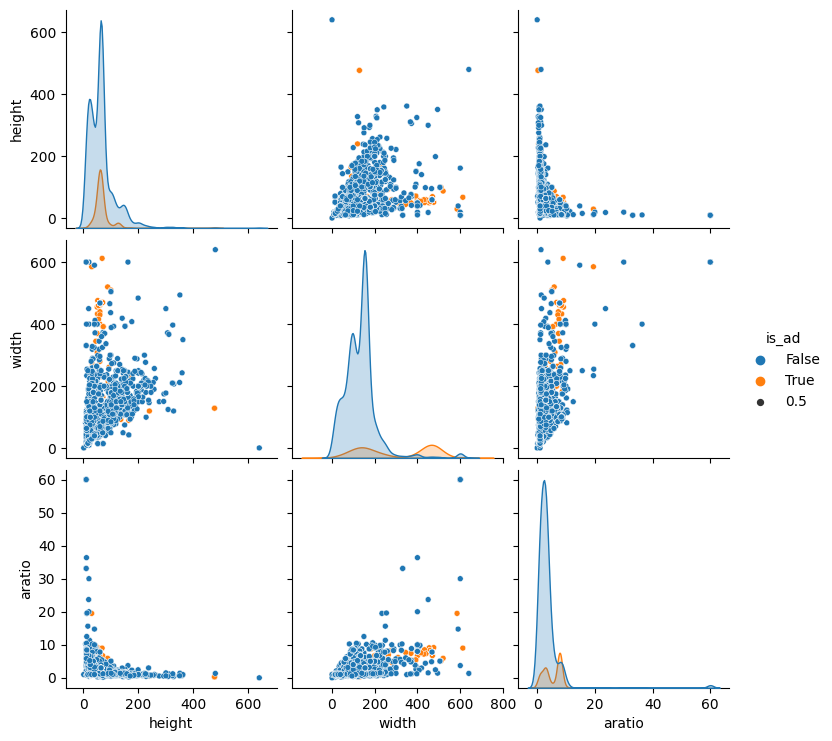

In [15]:
sns.pairplot(pair, hue='is_ad', plot_kws=dict(size=0.5))

**Note the different, non-normally distributed aspect ratio of ads, compared to the relatively normal distribution of non-ads**

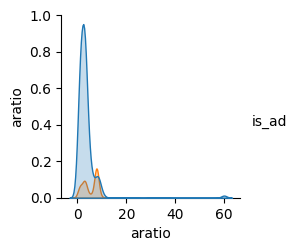

In [16]:
sns.pairplot(hist, hue='is_ad', plot_kws=dict(size=0.5))

**Since our continuous variables are not normally distributed, we do not want to implement standardization.  Instead, we will use a min-max scaler to scale our features, excluding those which are binary-encoded.**

**First, we split X (our features) and Y (our ad/not ad classification) using an 80/20 train/test split**

In [17]:
train, test = train_test_split(data, test_size=0.2, random_state=1)
X_train, y_train = train.drop(columns=['is_ad']), train['is_ad']
X_test, y_test = test.drop(columns=['is_ad']), test['is_ad']

In [18]:
X_train[0:2], y_train[0:2]

(      height  width  aratio  local  url*images+buttons  url*likesbooks.com  \
 2700      40     70  1.7500      1                   0                   0   
 1399      49     96  1.9591      0                   0                   0   
 
       url*www.slake.com  url*hydrogeologist  url*oso  url*media  ...  \
 2700                  0                   0        0          0  ...   
 1399                  0                   0        0          0  ...   
 
       caption*of  caption*home  caption*my  caption*your  caption*in  \
 2700           0             0           0             0           0   
 1399           0             0           0             0           0   
 
       caption*bytes  caption*here  caption*click  caption*for  caption*you  
 2700              0             0              0            0            0  
 1399              0             0              0            0            0  
 
 [2 rows x 1558 columns],
 2700    False
 1399    False
 Name: is_ad, dtype: bool)

**The we will implement min/max scaling on our X values**

In [19]:
scaler = MinMaxScaler()
X_train_min_max = scaler.fit_transform(X_train)
X_test_min_max = scaler.fit_transform(X_test)

In [20]:
X_train_min_max[0:5], X_test_min_max[0:5]

(array([[0.06103286, 0.10798122, 0.0291424 , ..., 0.        , 0.        ,
         0.        ],
        [0.07511737, 0.1486698 , 0.03262748, ..., 0.        , 0.        ,
         0.        ],
        [0.20500782, 0.20187793, 0.01638874, ..., 0.        , 0.        ,
         0.        ],
        [0.09859155, 0.24100156, 0.04997625, ..., 0.        , 0.        ,
         0.        ],
        [0.0172144 , 0.08763693, 0.07914365, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.11563169, 0.24576271, 0.04585583, ..., 0.        , 0.        ,
         0.        ],
        [0.03640257, 0.35254237, 0.1307914 , ..., 0.        , 0.        ,
         0.        ],
        [0.10706638, 0.37966102, 0.06092127, ..., 0.        , 0.        ,
         0.        ],
        [0.02997859, 0.18644068, 0.07933458, ..., 0.        , 0.        ,
         0.        ],
        [0.11563169, 0.24576271, 0.04585583, ..., 0.        , 0.        ,
         0.        ]]))